# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [20]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1722891308731.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,08/02/2024,5346.56,5376.63,5383.89,5302.03
1,08/01/2024,5446.68,5537.84,5566.16,5410.42
2,07/31/2024,5522.30,5505.59,5551.51,5493.75
3,07/30/2024,5436.44,5478.73,5489.46,5401.70
4,07/29/2024,5463.54,5476.55,5487.74,5444.44
...,...,...,...,...,...
2523,08/11/2014,1936.92,1933.43,1944.90,1933.43
2524,08/08/2014,1931.59,1910.35,1932.38,1909.01
2525,08/07/2014,1909.57,1923.03,1928.89,1904.78
2526,08/06/2014,1920.24,1917.29,1927.91,1911.45


In [21]:
df.describe()

,Close/Last,Open,High,Low
count,2528.000000,2528.00000,2528.000000,2528.000000
mean,3194.727362,3184.48193,3201.494731,3166.194862
std,992.638517,1013.50021,1019.095402,1007.775150
min,1829.080000,0.00000,0.000000,0.000000
25%,2273.952500,2271.71000,2278.987500,2266.147500
50%,2901.325000,2905.59500,2911.765000,2891.080000
75%,4110.027500,4101.78750,4133.440000,4079.367500
max,5667.200000,5644.09000,5669.670000,5639.020000


In [22]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3200.157591,3199.670238,3216.764181,3181.295950
std,991.869753,991.698969,997.182542,986.101657
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2292.950000,2289.382500,2297.777500,2284.165000
50%,2905.305000,2908.860000,2917.250000,2893.985000
75%,4113.185000,4106.002500,4135.790000,4082.822500
max,5667.200000,5644.090000,5669.670000,5639.020000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2527
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [24]:
df.shape

(2516, 5)

In [25]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

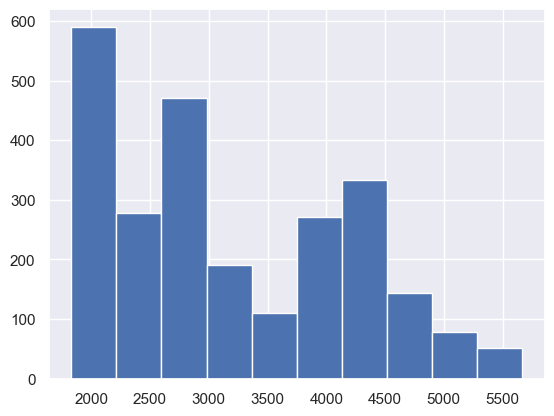

In [26]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [27]:
close_current = df['Close/Last'].iloc[0]
close_current

5346.56

In [28]:
close_mean = df['Close/Last'].mean()
close_mean

3200.157591414949

In [29]:
close_sd = df['Close/Last'].std()
close_sd

991.8697534049538

In [30]:
sigma1 = close_mean + close_sd
sigma1

4192.027344819902

In [31]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5183.897098224857

In [32]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5679.831974927333

In [33]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2527
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [34]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-08-05 to 2024-08-02')

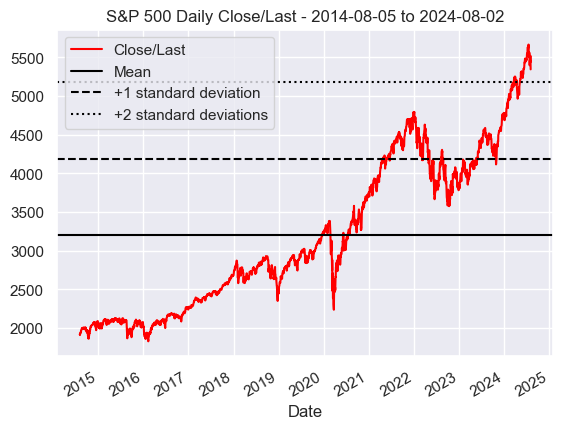

In [35]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-08-05 to 2024-08-02')

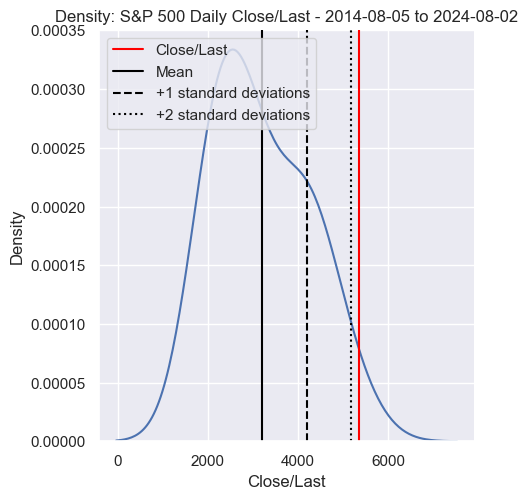

In [39]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_current, color=c, label='Close/Last')
plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [37]:
z_score = (close_current - close_mean)/close_sd
z_score

2.1639962315785355

In [38]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results